### Look into the speed of P- and S-waves from a real earthquake by looking at how the time of earthquake arrivals relates to the distance between source and station. Check out whether this varies with azimuth.

In [44]:
import obspy
import numpy as np
from obspy.clients.fdsn.client import Client
import cartopy
import pandas as pd
import geopandas as gpd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Make an obspy Catalog object from the QuakeML file.
cat = obspy.core.event.read_events('XO_2019_01.quakeml')

## Let's look at one magnitude 5 earthquake

#### Note- distance is in degrees so that has to be converted. Students should calculate it themselves from station location

In [131]:
event = cat[7]
arrivals = event.origins[0].arrivals
p_arr = [a for a in arrivals if a.phase=='P']
s_arr = [a for a in arrivals if a.phase=='S']
p_dist = [a.distance * 111 for a in p_arr]
s_dist = [s.distance * 111 for s in s_arr]
p_pick = [p for p in event.picks if p.resource_id in [a.pick_id for a in p_arr]]
s_pick = [p for p in event.picks if p.resource_id in [a.pick_id for a in s_arr]]
p_tt = [p.time - event.origins[0].time for p in p_pick]
s_tt = [s.time - event.origins[0].time for s in s_pick]
p_az = [p.azimuth for p in p_arr]
s_az = [s.azimuth for s in s_arr]

## P- and S-wave velocities look reasonable

P-wave slope is 8.167426703737915 km/s.
S-wave slope is 4.825493373364722 km/s.


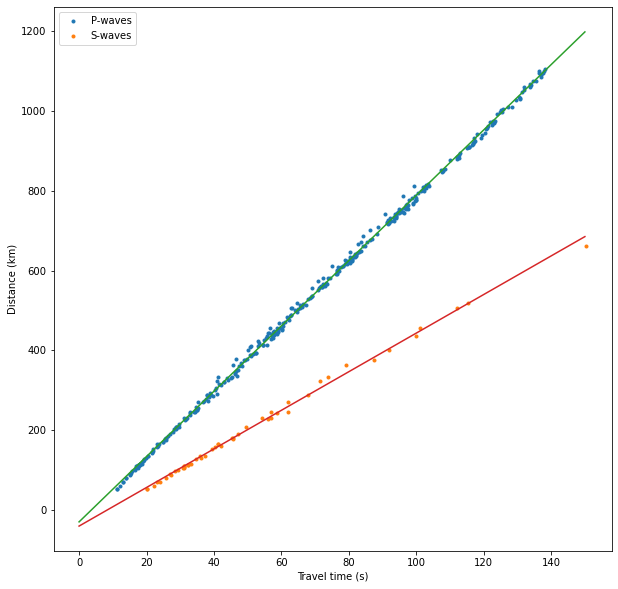

In [132]:
fig,ax = plt.subplots(1,1,figsize=[10,10])
ax.plot(p_tt,p_dist,'.')
ax.plot(s_tt,s_dist,'.')
ax.set_xlabel('Travel time (s)')
ax.set_ylabel('Distance (km)')
ax.legend(['P-waves','S-waves'])

# P-wave fit
m,b = np.polyfit(p_tt,p_dist,1)
x_p = np.linspace(0,150)
ax.plot(x_p,x_p*m + b,'-')
print('P-wave slope is '+str(m)+' km/s.')

# S-wave fit
m,b = np.polyfit(s_tt,s_dist,1)
x_p = np.linspace(0,150)
ax.plot(x_p,x_p*m + b,'-')
print('S-wave slope is '+str(m)+' km/s.')

## Looks like there is a bit of slope dependence on azimuth which could be something for the students to look into

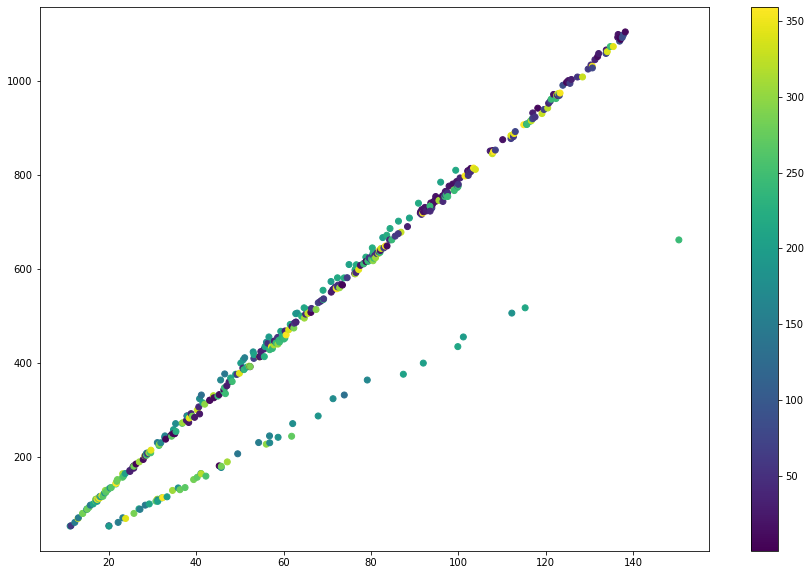

In [133]:
fig,ax = plt.subplots(1,1,figsize=[15,10])
s = ax.scatter(p_tt,p_dist,c=p_az)
ax.scatter(s_tt,s_dist,c=s_az)
plt.colorbar(s)

#### Split the P-wave arrivals into bins based on azimuth and fit each with a line to find velocity- there is indeed some interesting things!

/opt/anaconda3/envs/mseismo/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'P-wave velocity')

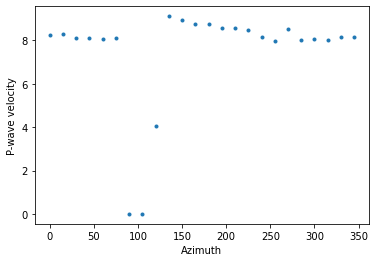

In [134]:
az_bins = np.linspace(0,360,25)

p_vel = []
for i in range(len(az_bins)-1):
    min_az = az_bins[i]
    max_az = az_bins[i+1]
    ind = [j for j,az in enumerate(p_az) if (az > min_az) & (az < max_az)]
    if ind:
        dist = [p_dist[j] for j in ind]
        tt = [p_tt[j] for j in ind]
        m,b = np.polyfit(tt,dist,1)
        p_vel.append(m)
    else:
        p_vel.append(0)

fig,ax = plt.subplots(1,1)
ax.plot(az_bins[0:24],p_vel,'.')
ax.set_xlabel('Azimuth')
ax.set_ylabel('P-wave velocity')